# Présentation du jeu de données - BIKE SHARING DEMAND

# NETTOYAGE

In [37]:
#Importation librairies
import pandas as pd
import numpy as np

In [38]:
# Régler l'affichage
pd.set_option('display.max_columns', None)

In [39]:
# Importation des données et visualisation 
df = pd.read_csv('datasets/train.csv', parse_dates=True, index_col='datetime') 
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [40]:
#Traitement des doublons
print(df.duplicated().sum())

21


In [41]:
#Traitement des valeurs manquantes
print(df.isnull().sum()) 

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [42]:
#Attributs
df.dtypes
# (ou df.info())

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [43]:
#Taille de la matrice
df.shape

(10886, 11)

In [44]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## Distribution des features

In [45]:
#Importation librairies pour visualisations graphiques
import matplotlib.pyplot as plt
import seaborn as sns

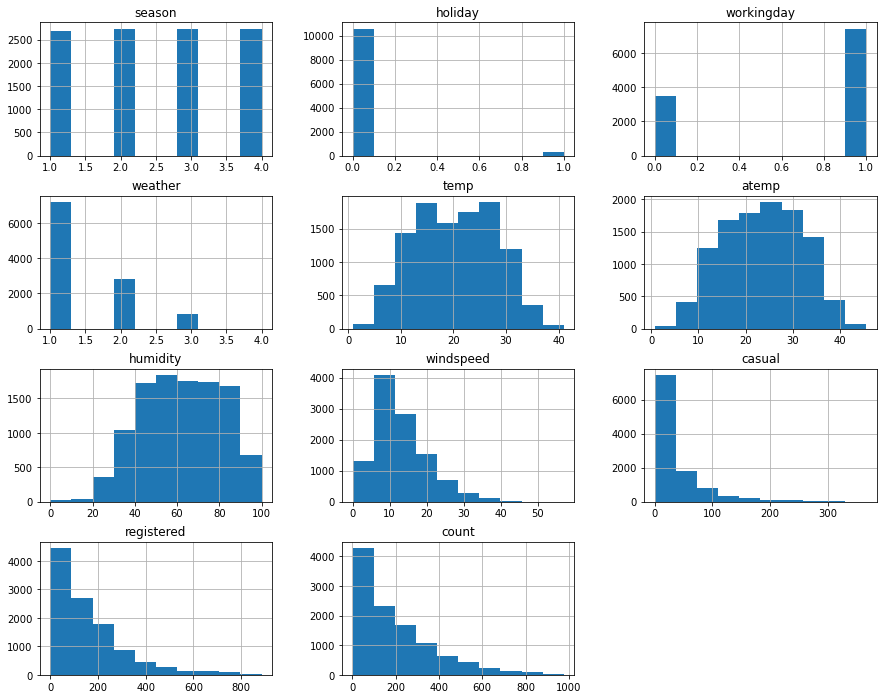

In [46]:
#Histogrammes sans log

df.hist(figsize = (15,12))
plt.show()

## Etude du "count" (target)

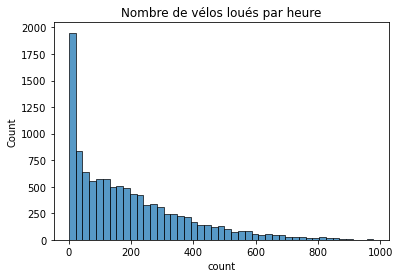

In [47]:
# Count - Distribution
sns.histplot(data=df, x='count')
plt.title("Nombre de vélos loués par heure")
plt.show()

In [48]:
print('Casual + Registered = Count ? ', ~(df.casual + df.registered - df['count']).any())

Casual + Registered = Count ?  True


# EDA

In [49]:
# Conversion en données catégorielles
category_list = ['season', 'holiday', 'workingday', 'weather']
for var in category_list:
    df[var] = df[var].astype('category')
    

In [50]:
# Remplacement des nombres
season_dict = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'} #erreur rectifiée par rapport aux explications Kaggle
weather_dict = {1:'Clear', 2:'Misty+Cloudy', 3:'Light Snow/Rain', 4:'Heavy Snow/Rain'}
df['season'] = df['season'].map(season_dict)
df['weather'] = df['weather'].map(weather_dict)

df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,Winter,0,0,Clear,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,Winter,0,0,Clear,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,Winter,0,0,Clear,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,Winter,0,0,Clear,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,Winter,0,0,Clear,9.84,14.395,75,0.0,0,1,1


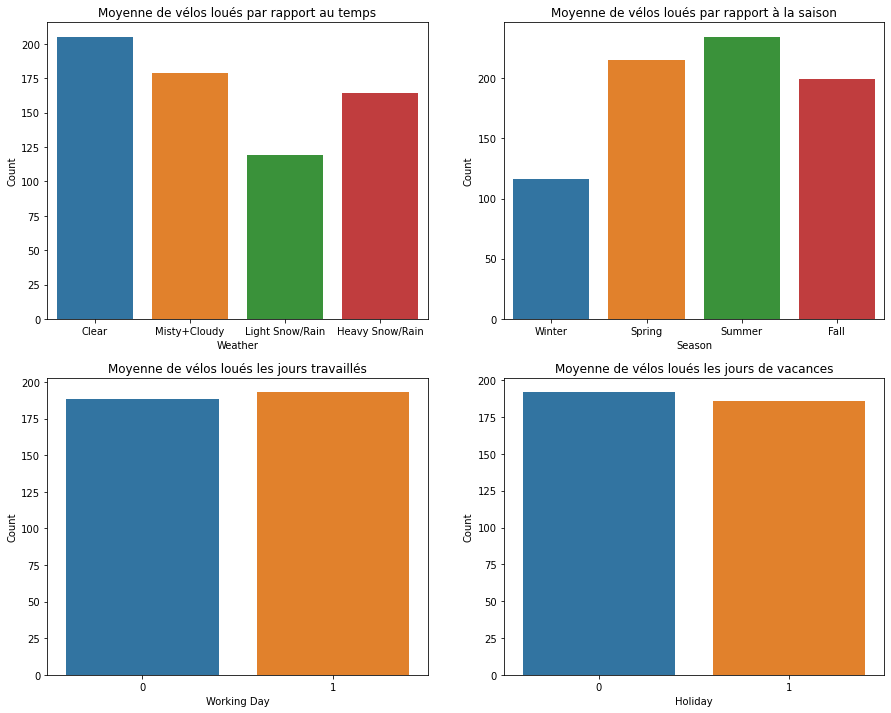

In [51]:
# Moyenne de vélos loués par catégories

fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 1)
group_weather = pd.DataFrame(df.groupby(['weather'])['count'].mean()).reset_index()
sns.barplot(data=group_weather, x='weather', y='count', ax=axes)
axes.set(xlabel='Weather', ylabel='Count', title='Moyenne de vélos loués par rapport au temps')

axes = fig.add_subplot(2, 2, 2)
group_season = pd.DataFrame(df.groupby(['season'])['count'].mean()).reset_index()
sns.barplot(data=group_season, x='season', y='count', ax=axes)
axes.set(xlabel='Season', ylabel='Count', title='Moyenne de vélos loués par rapport à la saison')

axes = fig.add_subplot(2, 2, 3)
group_workingday = pd.DataFrame(df.groupby(['workingday'])['count'].mean()).reset_index()
sns.barplot(data=group_workingday, x='workingday', y='count', ax=axes)
axes.set(xlabel='Working Day', ylabel='Count', title='Moyenne de vélos loués les jours travaillés')

axes = fig.add_subplot(2, 2, 4)
group_season = pd.DataFrame(df.groupby(['holiday'])['count'].mean()).reset_index()
sns.barplot(data=group_season, x='holiday', y='count', ax=axes)
axes.set(xlabel='Holiday', ylabel='Count', title='Moyenne de vélos loués les jours de vacances')
plt.show()

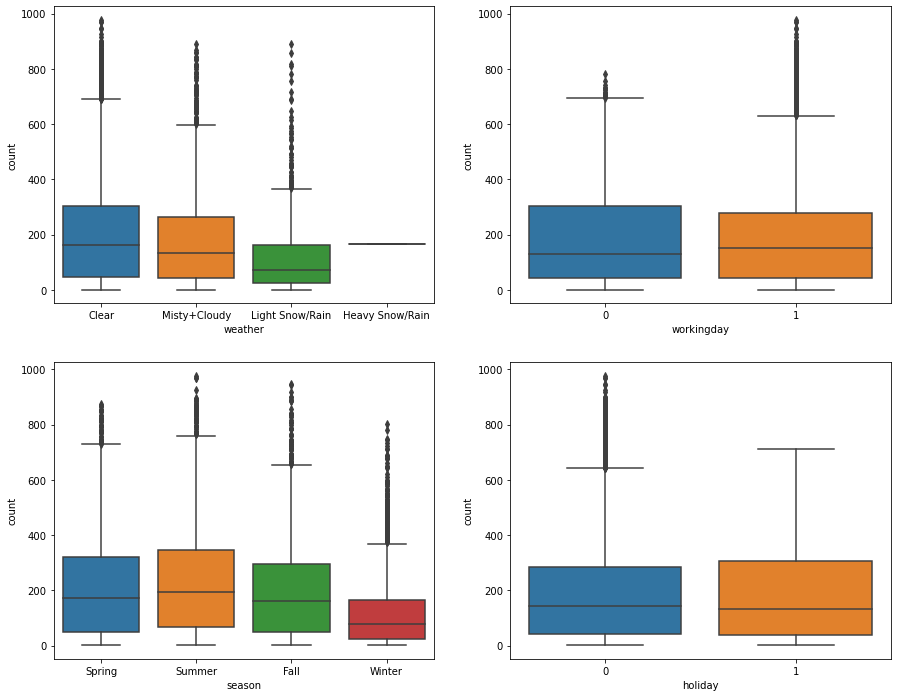

In [52]:
# SRepérer les outliers
f, axes = plt.subplots(2, 2, figsize=(15, 12))
hue_order= ['Clear', 'Misty+Cloudy', 'Light Snow/Rain', 'Heavy Snow/Rain' ]
sns.boxplot(data=df, y='count', x='weather', ax=axes[0][0], order=hue_order)
sns.boxplot(data=df, y='count', x='workingday', ax=axes[0][1])
hue_order= ['Spring', 'Summer', 'Fall', 'Winter']
sns.boxplot(data=df, y='count', x='season', ax=axes[1][0], order=hue_order)
sns.boxplot(data=df, y='count', x='holiday', ax=axes[1][1])

plt.show()

Observations :

- Il y a plus de locations quand le temps est dégagé et ensoleillé.
- La location de vélos est plus faible en Hiver.


## Vélos loués en fonction des températures

C:\Users\APPREN~1\AppData\Local\Temp/ipykernel_10748/391301275.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata_w['temp_round'] = mydata_w['temp']//bin_size
C:\Users\APPREN~1\AppData\Local\Temp/ipykernel_10748/391301275.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata_nw['temp_round'] = mydata_nw['temp']//bin_size


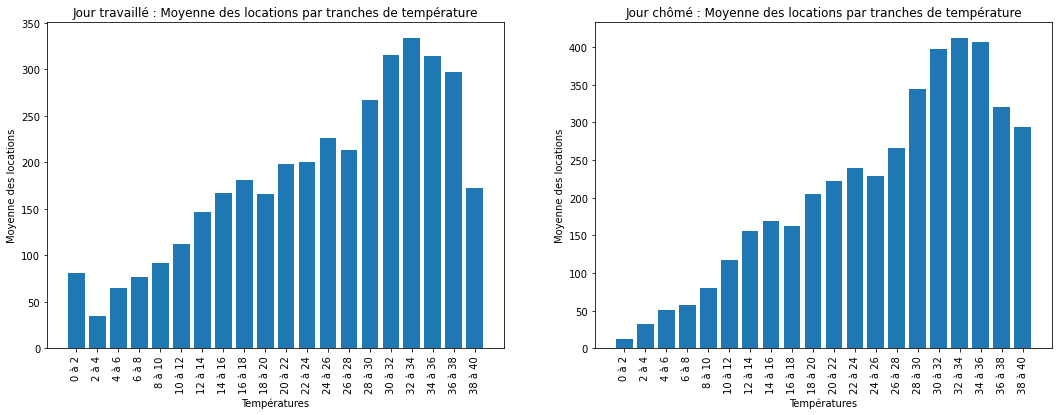

In [53]:
# Splitting data into working-day and non-working day
mydata_w = df[df.workingday==1]
mydata_nw = df[df.workingday==0]

bin_size = 2
mydata_w['temp_round'] = mydata_w['temp']//bin_size
mydata_nw['temp_round'] = mydata_nw['temp']//bin_size

mean_count_vs_temp_w = mydata_w.groupby('temp_round')['count'].mean()
mean_count_vs_temp_nw = mydata_nw.groupby('temp_round')['count'].mean()
idx_w, idx_nw = range(len(mean_count_vs_temp_w)), range(len(mean_count_vs_temp_nw))
labels_w = [str(bin_size*i)+' à '+str(bin_size*(i+1)) for i in range(len(mean_count_vs_temp_w))]
labels_nw = [str(bin_size*i)+' à '+str(bin_size*(i+1)) for i in range(len(mean_count_vs_temp_nw))]

fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
plt.bar(x=idx_w, height=mean_count_vs_temp_w)
plt.xticks(idx_w, labels_w, rotation=90)
plt.xlabel('Températures')
plt.ylabel('Moyenne des locations')
plt.title('Jour travaillé : Moyenne des locations par tranches de température')

axes = fig.add_subplot(1, 2, 2)
plt.bar(x=idx_nw, height=mean_count_vs_temp_nw)
plt.xticks(idx_nw, labels_nw, rotation=90)
plt.xlabel('Températures')
plt.ylabel('Moyenne des locations')
plt.title('Jour chômé : Moyenne des locations par tranches de température')

plt.show()

Observation :


Plus il fait beau (chaud), plus il y a de locations jusqu'à un certain point où ensuite les locations baissent (température trop élevée pour avoir envie de faire du vélo)

## Données manquantes

<AxesSubplot:>

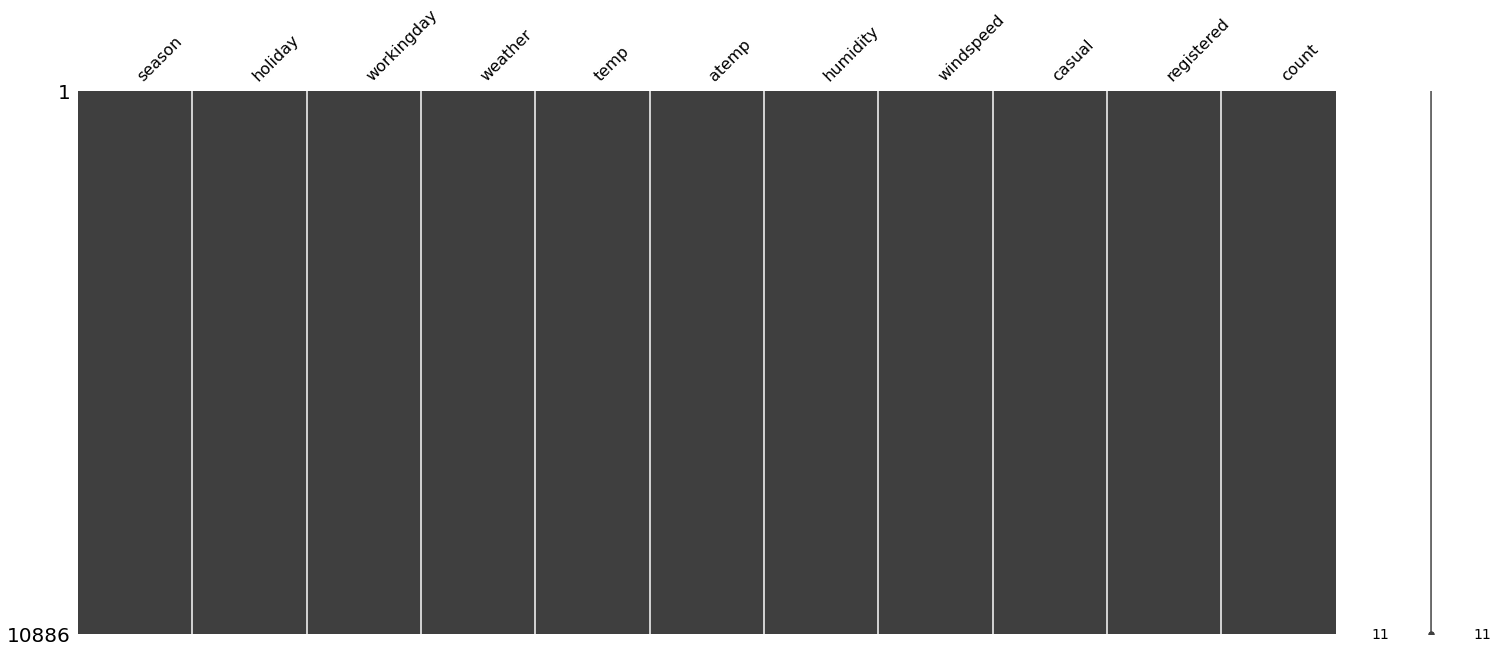

In [54]:
import missingno as msno

msno.matrix(df)

## Feature Engineering

In [55]:
df.index.max()

Timestamp('2012-12-19 23:00:00')

In [56]:
# Découpage de "datetime" en mois, date, heure, jour
df['month'] = [x.month for x in df.index]
df['day'] = [x.weekday() for x in df.index]
df['hour'] = [x.hour for x in df.index]
df["year"] = [x.year for x in df.index]

df['date'] = (df.index.max() - df.index)
df['date'] = [x.days for x in df.date]

df['is_night'] = 0
df.loc[(df['hour'] >= 20) | (df['hour'] <= 8), 'is_night'] = 1

category_list = ['month', 'day', 'hour']
for var in category_list:
    df[var] = df[var].astype('category')

    

In [57]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour,year,date,is_night
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,Winter,0,0,Clear,9.84,14.395,81,0.0000,3,13,16,1,5,0,2011,718,1
2011-01-01 01:00:00,Winter,0,0,Clear,9.02,13.635,80,0.0000,8,32,40,1,5,1,2011,718,1
2011-01-01 02:00:00,Winter,0,0,Clear,9.02,13.635,80,0.0000,5,27,32,1,5,2,2011,718,1
2011-01-01 03:00:00,Winter,0,0,Clear,9.84,14.395,75,0.0000,3,10,13,1,5,3,2011,718,1
2011-01-01 04:00:00,Winter,0,0,Clear,9.84,14.395,75,0.0000,0,1,1,1,5,4,2011,718,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,Fall,0,1,Clear,15.58,19.695,50,26.0027,7,329,336,12,2,19,2012,0,0
2012-12-19 20:00:00,Fall,0,1,Clear,14.76,17.425,57,15.0013,10,231,241,12,2,20,2012,0,1
2012-12-19 21:00:00,Fall,0,1,Clear,13.94,15.910,61,15.0013,4,164,168,12,2,21,2012,0,1


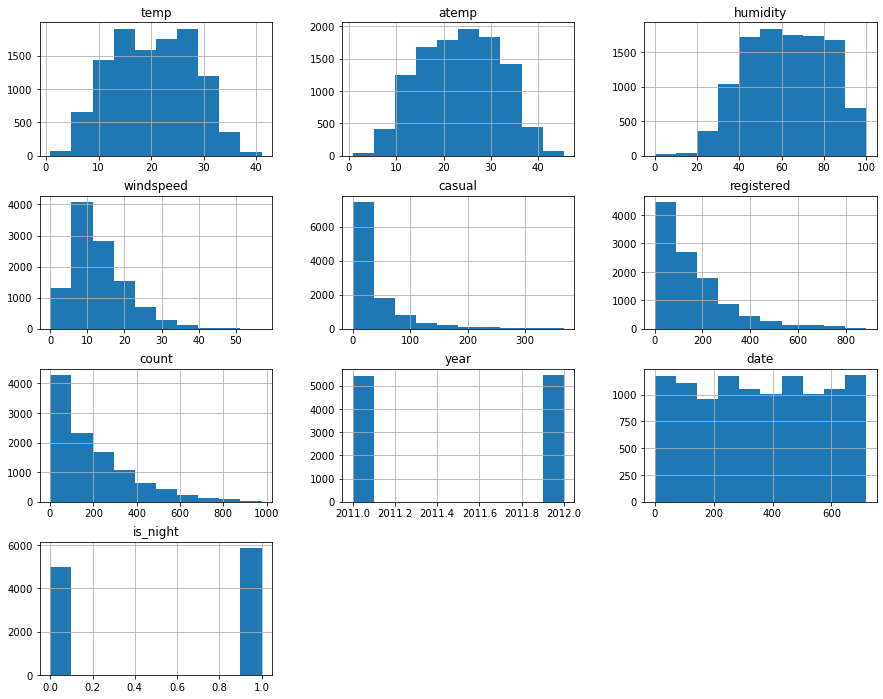

In [58]:
df.hist(figsize = (15,12))
plt.show()

In [59]:
# Lundi(0) au Dimanche(6)
day_dict = {0:'Monday', 1:'Teusday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day'] = df['day'].map(day_dict)

df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour,year,date,is_night
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,Winter,0,0,Clear,9.84,14.395,81,0.0,3,13,16,1,Saturday,0,2011,718,1
2011-01-01 01:00:00,Winter,0,0,Clear,9.02,13.635,80,0.0,8,32,40,1,Saturday,1,2011,718,1
2011-01-01 02:00:00,Winter,0,0,Clear,9.02,13.635,80,0.0,5,27,32,1,Saturday,2,2011,718,1
2011-01-01 03:00:00,Winter,0,0,Clear,9.84,14.395,75,0.0,3,10,13,1,Saturday,3,2011,718,1
2011-01-01 04:00:00,Winter,0,0,Clear,9.84,14.395,75,0.0,0,1,1,1,Saturday,4,2011,718,1


## Distribution par heures

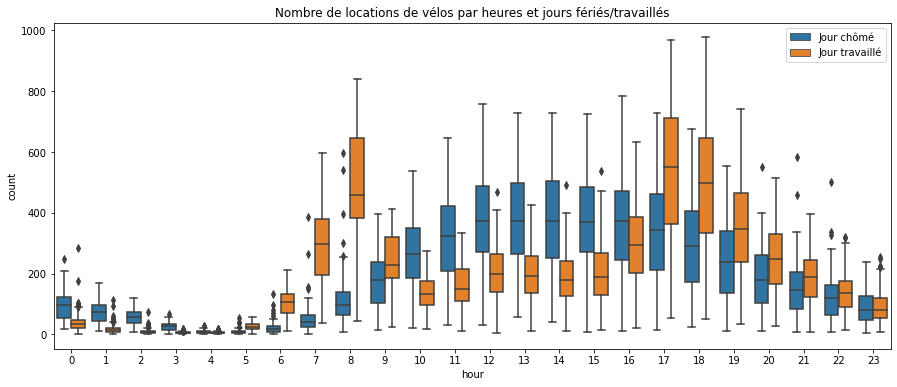

In [60]:
# seaborn boxplots across hours
f, axes = plt.subplots(1, 1, figsize=(15, 6))
sns.boxplot(data=df, y='count', x='hour', hue='workingday', ax=axes)
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Jour chômé', 'Jour travaillé'])
axes.set(title='Nombre de locations de vélos par heures et jours fériés/travaillés')

plt.show()

C:\Users\Apprenant\anaconda3\envs\devia\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


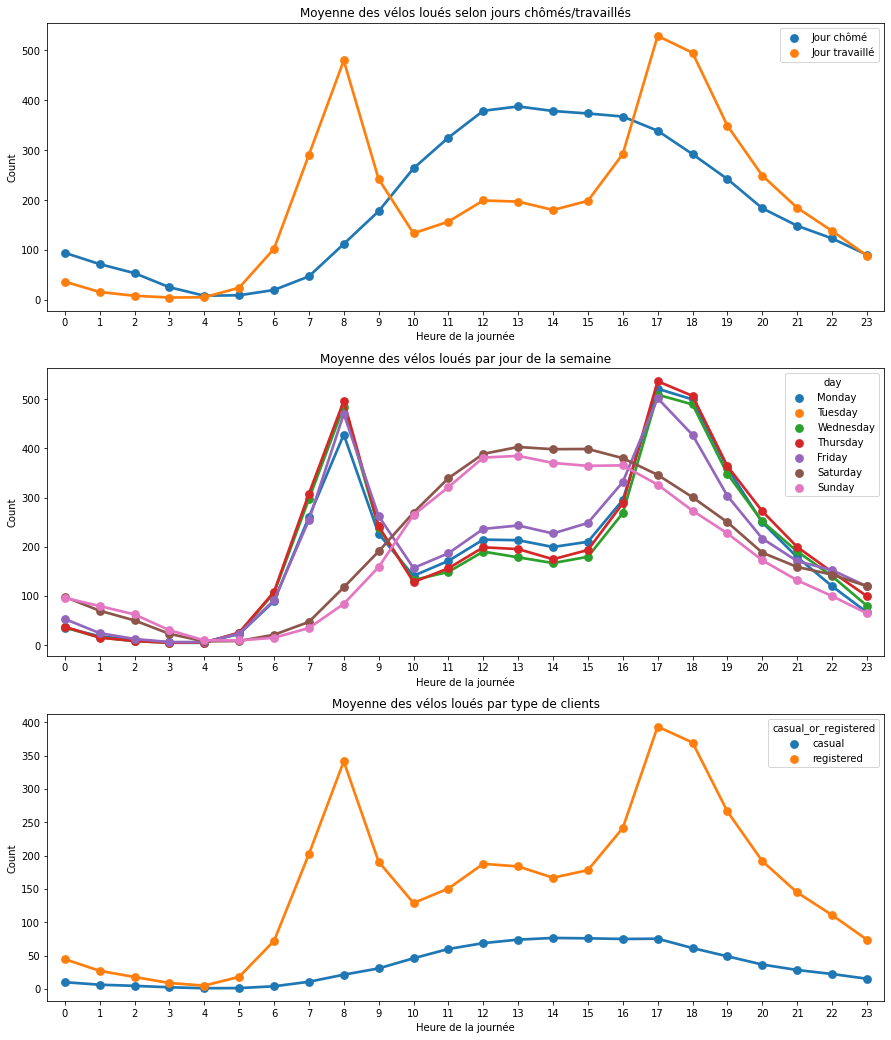

In [61]:
# Moyenne des vélos loués par heure selon différentes catégories

f, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 18))
group_work_hour = pd.DataFrame(df.groupby(['workingday', 'hour'])['count'].mean()).reset_index()
sns.pointplot(data=group_work_hour, x='hour', y='count', hue='workingday', ax=axes[0], legend=True)
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ['Jour chômé', 'Jour travaillé'])
axes[0].set(xlabel='Heure de la journée', ylabel='Count', title='Moyenne des vélos loués selon jours chômés/travaillés')

hue_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
group_day_hour = pd.DataFrame(df.groupby(['day', 'hour'])['count'].mean()).reset_index()
sns.pointplot(data=group_day_hour, x='hour', y='count', hue='day', ax=axes[1], hue_order=hue_order)
axes[1].set(xlabel='Heure de la journée', ylabel='Count', title='Moyenne des vélos loués par jour de la semaine')

df_melt = pd.melt(frame=df, id_vars='hour', value_vars=['casual', 'registered'], value_name='count', var_name='casual_or_registered')
group_casual_hour = pd.DataFrame(df_melt.groupby(['hour', 'casual_or_registered'])['count'].mean()).reset_index()
sns.pointplot(data=group_casual_hour, x='hour', y='count', hue='casual_or_registered', ax=axes[2])
axes[2].set(xlabel='Heure de la journée', ylabel='Count', title='Moyenne des vélos loués par type de clients')

plt.show()

## Distribution par mois

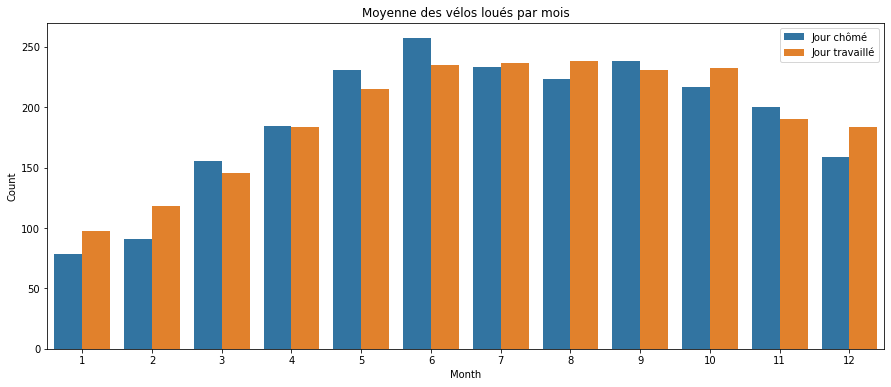

In [62]:
# Moyenne des vélos loués par mois
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
group_month = pd.DataFrame(df.groupby(['month', 'workingday'])['count'].mean()).reset_index()
sns.barplot(data=group_month, x='month', y='count', hue='workingday', ax=axes)
axes.set(xlabel='Month', ylabel='Count', title='Moyenne des vélos loués par mois')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Jour chômé', 'Jour travaillé'])
plt.show()

Observations

- Les jours travaillés, il y a plus de réservations aux heures de trajets d'arrivée (8h) et de sortie (17h-18h) du travail.
- Le week-end, on a une courbe avec pour pic le début d'après-midi (ballades)
- Les inscrits suivent la représentation des jours travaillés, là où les non-inscrits suivent plus celle des jours chômés


### Par température

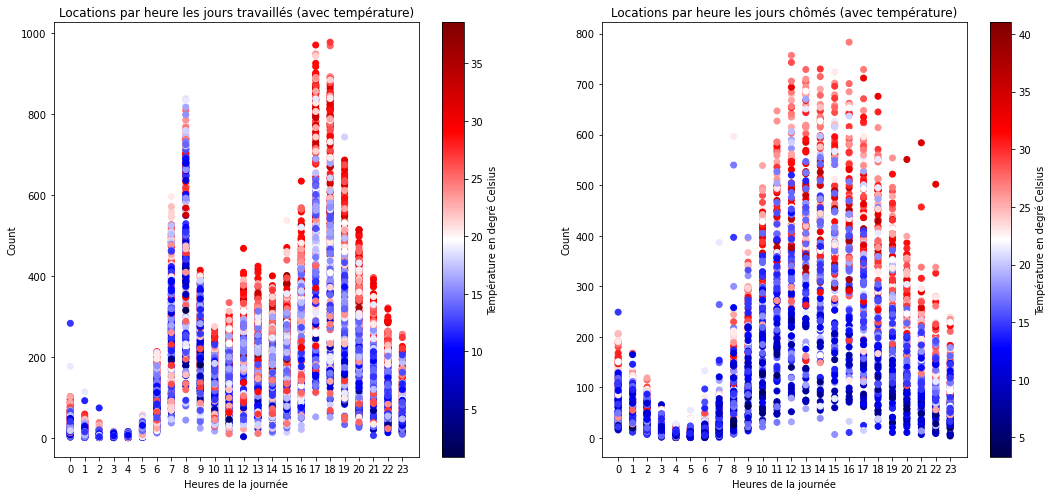

In [63]:
mydata_w = df[df.workingday==1]
mydata_nw = df[df.workingday==0]

fig = plt.figure(figsize=(18, 8))

# Jours travaillés
axes = fig.add_subplot(1, 2, 1)
f = axes.scatter(mydata_w.hour, mydata_w['count'], c=mydata_w.temp, cmap = 'seismic')
axes.set(xticks = range(24), xlabel='Heures de la journée', ylabel='Count', title='Locations par heure les jours travaillés (avec température)')
cbar = plt.colorbar(f)
cbar.set_label('Température en degré Celsius')

# Jours chômés
axes = fig.add_subplot(1, 2, 2)
f = axes.scatter(mydata_nw.hour, mydata_nw['count'], c=mydata_nw.temp, cmap = 'seismic')
axes.set(xticks = range(24), xlabel='Heures de la journée', ylabel='Count', title='Locations par heure les jours chômés (avec température)')
cbar = plt.colorbar(f)
cbar.set_label('Température en degré Celsius')

plt.show()

- Très forte tendance à louer des vélos quand il fait plus chaud les jours chômés
- Tendance identique mais légèrement moins nette les jours travaillés

## CORRELATIONS

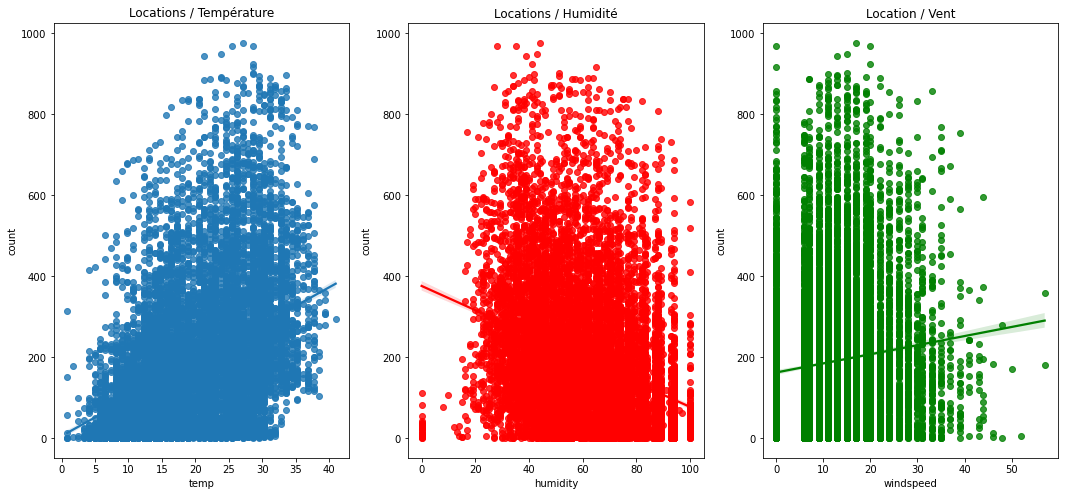

In [64]:
# Régressions avec nombre de locations et : température, humidité, force du vent
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data=df, x='temp', y='count',ax=axes)
axes.set(title='Locations / Température')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=df, x='humidity', y='count',ax=axes, color='r')
axes.set(title='Locations / Humidité')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=df, x='windspeed', y='count',ax=axes, color='g')
axes.set(title='Location / Vent')
plt.show()

- Corrélation positive avec la températuve et la force du vent.
- Corrélation négative avec l'humidité.

### Matrice de corrélation

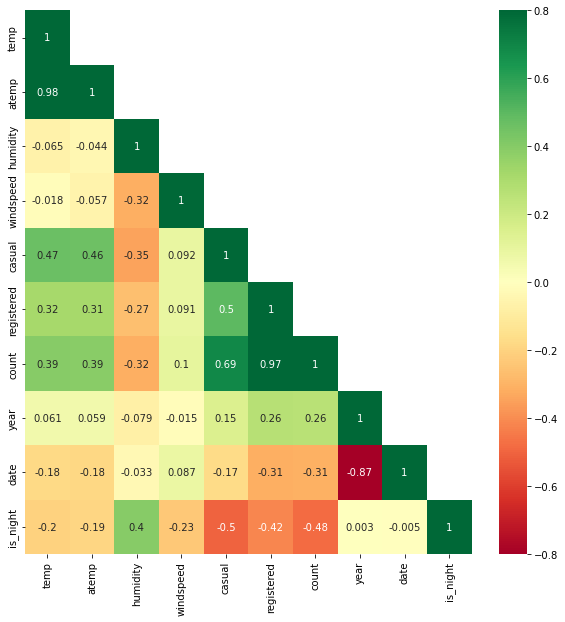

In [65]:
corr_matrix = df.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

fig = plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
plt.show()

- Température et Température ressentie sont très corrélées
- Clients inscrits ayant loué et nombre de locations sont très corréelées également

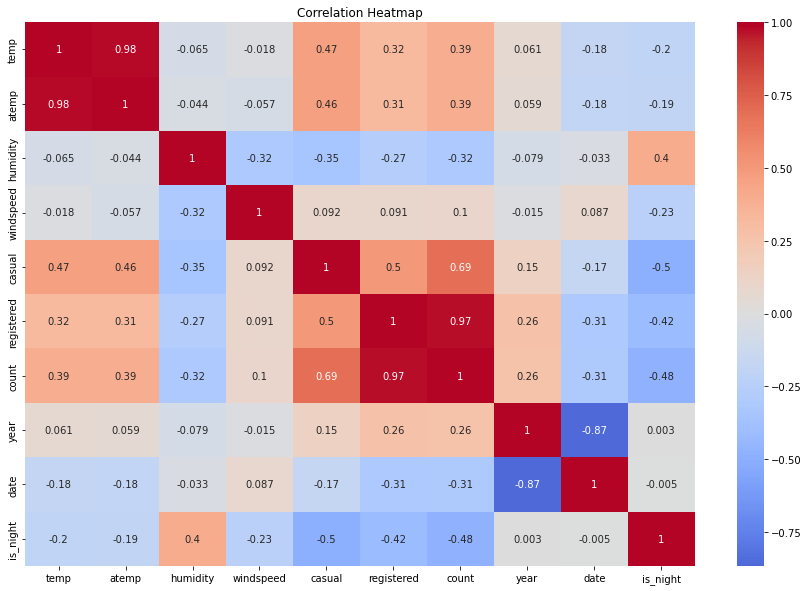

In [66]:
#Matrice avec valeurs
correlation = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(correlation, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [67]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour,year,date,is_night
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,Winter,0,0,Clear,9.84,14.395,81,0.0000,3,13,16,1,Saturday,0,2011,718,1
2011-01-01 01:00:00,Winter,0,0,Clear,9.02,13.635,80,0.0000,8,32,40,1,Saturday,1,2011,718,1
2011-01-01 02:00:00,Winter,0,0,Clear,9.02,13.635,80,0.0000,5,27,32,1,Saturday,2,2011,718,1
2011-01-01 03:00:00,Winter,0,0,Clear,9.84,14.395,75,0.0000,3,10,13,1,Saturday,3,2011,718,1
2011-01-01 04:00:00,Winter,0,0,Clear,9.84,14.395,75,0.0000,0,1,1,1,Saturday,4,2011,718,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,Fall,0,1,Clear,15.58,19.695,50,26.0027,7,329,336,12,Wednesday,19,2012,0,0
2012-12-19 20:00:00,Fall,0,1,Clear,14.76,17.425,57,15.0013,10,231,241,12,Wednesday,20,2012,0,1
2012-12-19 21:00:00,Fall,0,1,Clear,13.94,15.910,61,15.0013,4,164,168,12,Wednesday,21,2012,0,1


In [68]:
df.to_csv('datasets/velille.csv')